# 1

Ｑ1:

Try the set of equation[0:11], [1:12], [3:13], then calculete by np.linalg.solve

To check which solution is the best, I put each calculated coordinate into a set, so it will leave 8 calculated coordinate. Then I take out the original point that it calculate because we don't have the data of it in real life.

Finally, we calculate the difference between real data and calculated data.

The difference between the calculation and actual data is: 4.950247109950816


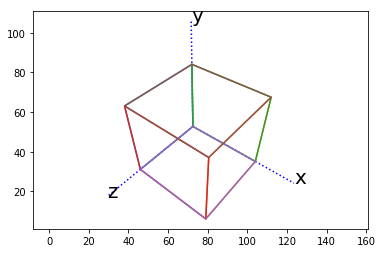

The difference between the calculation and actual data is: 4.600344370093346


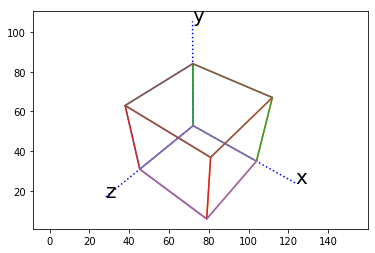

The difference between the calculation and actual data is: 9.4483287699965


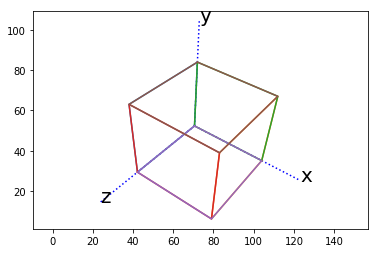

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.linalg import null_space

# 8 points of a cube in 3D space.
points = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
                   [0, 0, 1, 1, 0, 0, 1, 1],
                   [0, 1, 0, 1, 0, 1, 0, 1], 
                   [1, 1, 1, 1, 1, 1, 1, 1]])

# 7 points of a cube in the image space.  Ignore the (0,0,0) point, because we cannot see it in the image.
img = np.array([[46, 72, 38, 104, 79, 112, 83],
                [69, 16, 37,  65, 94,  33, 65]])


# draw the cube for verification
def plotcube(pt, P):
    """plot a cube described by pt. 
       T is the transition matrix that maps objects from a 3D space to a 2D screen.
       The camera is at [1/2, 1/2, sqrt(2)/2]"""
        
    def drawAxis():
        """ draw the axes of the 3D space"""
        X = np.dot(P, [[0, 1.5],[0, 0],[0, 0], [1, 1]])
        Y = np.dot(P, [[0, 0],[0, 1.5],[0, 0], [1, 1]])
        Z = np.dot(P, [[0, 0],[0, 0],[0, 1.5], [1, 1]])
        
        np.divide(X[0:2, 0:2], X[2, 0:2], X[0:2, 0:2])
        np.divide(Y[0:2, 0:2], Y[2, 0:2], Y[0:2, 0:2])
        np.divide(Z[0:2, 0:2], Z[2, 0:2], Z[0:2, 0:2])
        
        #'b:'代表藍色虛線
        plt.plot(X[0,0:2], 100-X[1,0:2], 'b:')
        plt.plot(Y[0,:], 100-Y[1,:], 'b:')
        plt.plot(Z[0,:], 100-Z[1,:], 'b:')
        plt.text(X[0,1], 100-X[1,1], r'x', fontsize=20)
        plt.text(Y[0,1], 100-Y[1,1], r'y', fontsize=20)
        plt.text(Z[0,1]-0.1, 100-Z[1,1], r'z', fontsize=20)

        
    def mapRectangle(p1, p2, p3, p4):
        """return two 1D arrays: X list and Y list from
           points[:, p1], points[:,p2], points[:, p3], points[:, p4]"""
        A = np.dot(P, points[:, [p1, p2, p3, p4, p1]])
        np.divide(A[0:2, :], A[2, :], A[0:2, :])
        return A[0,:], 100-A[1,:]
        
    drawAxis()

    x_set = set()
    y_set = set()
    
    # plot face 1
    X1, Y1 = mapRectangle(0, 1, 3, 2)
    plt.plot(X1, Y1)
    x_set.update(tuple(X1))
    y_set.update(tuple(100-Y1))

    # plot face 2
    X2, Y2 = mapRectangle(4, 6, 7, 5)
    plt.plot(X2, Y2)
    x_set.update(tuple(X2))
    y_set.update(tuple(100-Y2))

    # plot face 3
    X3, Y3 = mapRectangle(0, 2, 6, 4)
    plt.plot(X3, Y3)
    x_set.update(tuple(X3))
    y_set.update(tuple(100-Y3))

    # plot face 4
    X4, Y4 = mapRectangle(1, 5, 7, 3)
    plt.plot(X4, Y4)
    x_set.update(tuple(X4))
    y_set.update(tuple(100-Y4))

    # plot face 5
    X5, Y5 = mapRectangle(0, 4, 5, 1)
    plt.plot(X5, Y5)
    x_set.update(tuple(X5))
    y_set.update(tuple(100-Y5))

    # plot face 6
    X6, Y6 = mapRectangle(2, 3, 7, 6)
    plt.plot(X6, Y6)
    x_set.update(tuple(X6))
    y_set.update(tuple(100-Y6))

    #雖然會有30個點被算出來 但其實只有8個不重複的
    x_cal = sorted(list(set(x_set)))
    y_cal = sorted(list(set(y_set)))

    #找原點之後濾掉
    X = np.dot(P, [[0, 1.5],[0, 0],[0, 0], [1, 1]])
    origin = [X[0,0],X[1,0]]

    for i in x_cal:
        if i == origin[0]:
            x_cal.remove(i)
    for i in y_cal:
        if i == origin[1]:
            y_cal.remove(i)

    #計算算出來的跟正確數值的誤差
    x_img = [38, 46, 72, 79, 83, 104, 112]
    y_img = [16, 33, 37, 65, 65, 69, 94]

    diff = 0
    for i in range(0,7):
        diff += abs(x_img[i] - x_cal[i])
        diff += abs(y_img[i] - y_cal[i])
    print("The difference between the calculation and actual data is: ",end='')
    print(diff)

    plt.axis('equal')
    
    plt.show()

A = np.zeros([14, 11])
b = np.zeros([14, 1])


for i in range(7):
    j = 2*i
    A[j, 0:4] = points[:, i+1].T
    A[j, 8:11] = -1.0*img[0, i]*points[0:3, i+1].T 
    A[j+1, 4:8] = points[:, i+1].T
    A[j+1, 8:11] = -1.0*img[1, i]*points[0:3, i+1].T
    b[j] = img[0, i]
    b[j+1] = img[1, i]

# we select the first 11 equations to solve the linear system
A1 = A[0:11, :]
b1 = b[0:11]
x = np.linalg.solve(A1, b1)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)

# next equations
A2 = A[1:12, :]
b2 = b[1:12]
x = np.linalg.solve(A2, b2)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)

# next equations
A2 = A[2:13, :]
b2 = b[2:13]
x = np.linalg.solve(A2, b2)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)



# 2

Q2:

Calculate the same equation by np.linalg.solve and np.linalg.lstsq.

Then use the same method in Q1 to calculate the difference between two method and the real data.

The difference between the calculation and actual data is: 4.600344370093346


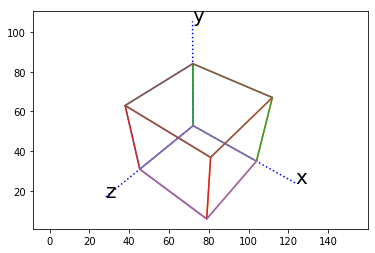

The difference between the calculation and actual data is: 4.0532512159199


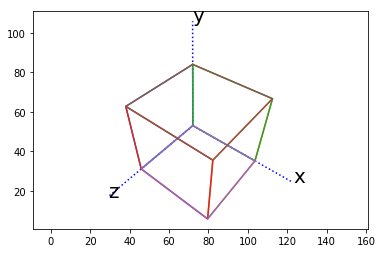

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.linalg import null_space

# 8 points of a cube in 3D space.
points = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
                   [0, 0, 1, 1, 0, 0, 1, 1],
                   [0, 1, 0, 1, 0, 1, 0, 1], 
                   [1, 1, 1, 1, 1, 1, 1, 1]])

# 7 points of a cube in the image space.  Ignore the (0,0,0) point, because we cannot see it in the image.
img = np.array([[46, 72, 38, 104, 79, 112, 83],
                [69, 16, 37,  65, 94,  33, 65]])


# draw the cube for verification
def plotcube(pt, P):
    """plot a cube described by pt. 
       T is the transition matrix that maps objects from a 3D space to a 2D screen.
       The camera is at [1/2, 1/2, sqrt(2)/2]"""
        
    def drawAxis():
        """ draw the axes of the 3D space"""
        X = np.dot(P, [[0, 1.5],[0, 0],[0, 0], [1, 1]])
        Y = np.dot(P, [[0, 0],[0, 1.5],[0, 0], [1, 1]])
        Z = np.dot(P, [[0, 0],[0, 0],[0, 1.5], [1, 1]])
        
        np.divide(X[0:2, 0:2], X[2, 0:2], X[0:2, 0:2])
        np.divide(Y[0:2, 0:2], Y[2, 0:2], Y[0:2, 0:2])
        np.divide(Z[0:2, 0:2], Z[2, 0:2], Z[0:2, 0:2])
        
        #'b:'代表藍色虛線
        plt.plot(X[0,0:2], 100-X[1,0:2], 'b:')
        plt.plot(Y[0,:], 100-Y[1,:], 'b:')
        plt.plot(Z[0,:], 100-Z[1,:], 'b:')
        plt.text(X[0,1], 100-X[1,1], r'x', fontsize=20)
        plt.text(Y[0,1], 100-Y[1,1], r'y', fontsize=20)
        plt.text(Z[0,1]-0.1, 100-Z[1,1], r'z', fontsize=20)

        
    def mapRectangle(p1, p2, p3, p4):
        """return two 1D arrays: X list and Y list from
           points[:, p1], points[:,p2], points[:, p3], points[:, p4]"""
        A = np.dot(P, points[:, [p1, p2, p3, p4, p1]])
        np.divide(A[0:2, :], A[2, :], A[0:2, :])
        return A[0,:], 100-A[1,:]
        
    drawAxis()

    x_set = set()
    y_set = set()
    
    # plot face 1
    X1, Y1 = mapRectangle(0, 1, 3, 2)
    plt.plot(X1, Y1)
    x_set.update(tuple(X1))
    y_set.update(tuple(100-Y1))

    # plot face 2
    X2, Y2 = mapRectangle(4, 6, 7, 5)
    plt.plot(X2, Y2)
    x_set.update(tuple(X2))
    y_set.update(tuple(100-Y2))

    # plot face 3
    X3, Y3 = mapRectangle(0, 2, 6, 4)
    plt.plot(X3, Y3)
    x_set.update(tuple(X3))
    y_set.update(tuple(100-Y3))

    # plot face 4
    X4, Y4 = mapRectangle(1, 5, 7, 3)
    plt.plot(X4, Y4)
    x_set.update(tuple(X4))
    y_set.update(tuple(100-Y4))

    # plot face 5
    X5, Y5 = mapRectangle(0, 4, 5, 1)
    plt.plot(X5, Y5)
    x_set.update(tuple(X5))
    y_set.update(tuple(100-Y5))

    # plot face 6
    X6, Y6 = mapRectangle(2, 3, 7, 6)
    plt.plot(X6, Y6)
    x_set.update(tuple(X6))
    y_set.update(tuple(100-Y6))

    #雖然會有30個點被算出來 但其實只有8個不重複的
    x_cal = sorted(list(set(x_set)))
    y_cal = sorted(list(set(y_set)))

    #找原點之後濾掉
    X = np.dot(P, [[0, 1.5],[0, 0],[0, 0], [1, 1]])
    origin = [X[0,0],X[1,0]]

    for i in x_cal:
        if i == origin[0]:
            x_cal.remove(i)
    for i in y_cal:
        if i == origin[1]:
            y_cal.remove(i)

    #計算算出來的跟正確數值的誤差
    x_img = [38, 46, 72, 79, 83, 104, 112]
    y_img = [16, 33, 37, 65, 65, 69, 94]

    diff = 0
    for i in range(0,7):
        diff += abs(x_img[i] - x_cal[i])
        diff += abs(y_img[i] - y_cal[i])
    print("The difference between the calculation and actual data is: ",end='')
    print(diff)

    plt.axis('equal')
    
    plt.show()

A = np.zeros([14, 11])
b = np.zeros([14, 1])


for i in range(7):
    j = 2*i
    A[j, 0:4] = points[:, i+1].T
    A[j, 8:11] = -1.0*img[0, i]*points[0:3, i+1].T 
    A[j+1, 4:8] = points[:, i+1].T
    A[j+1, 8:11] = -1.0*img[1, i]*points[0:3, i+1].T
    b[j] = img[0, i]
    b[j+1] = img[1, i]

# we select the best result equations in Q1 to solve the linear system
A1 = A[1:12, :]
b1 = b[1:12]
x = np.linalg.solve(A1, b1)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)

# using linear least square method
x, residuals, rank, s = np.linalg.lstsq(A,b,rcond=None)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)


# 3

Q3:

I take a picture of a rectangular object, then determined the coordinate in the 2D image. Input the data into the array. Then do the same algorithm in previous question. Also, we need to calculate the difference.

The difference between the calculation and actual data is: 0.7676438136886574


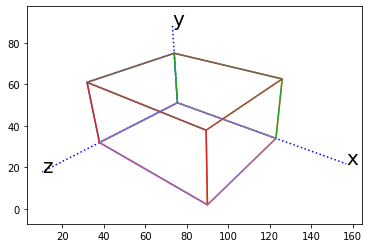

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.linalg import null_space

# 8 points of a cube in 3D space.
points = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
                   [0, 0, 1, 1, 0, 0, 1, 1],
                   [0, 1, 0, 1, 0, 1, 0, 1], 
                   [1, 1, 1, 1, 1, 1, 1, 1]])

# 7 points of a cube in the image space.  Ignore the (0,0,0) point, because we cannot see it in the image.
img = np.array([[38, 74, 32, 123, 90, 126, 89],
                [68, 25, 39,  66, 98,  37, 62]])


# draw the cube for verification
def plotcube(pt, P):
    """plot a cube described by pt. 
       T is the transition matrix that maps objects from a 3D space to a 2D screen.
       The camera is at [1/2, 1/2, sqrt(2)/2]"""
        
    def drawAxis():
        """ draw the axes of the 3D space"""
        X = np.dot(P, [[0, 1.5],[0, 0],[0, 0], [1, 1]])
        Y = np.dot(P, [[0, 0],[0, 1.5],[0, 0], [1, 1]])
        Z = np.dot(P, [[0, 0],[0, 0],[0, 1.5], [1, 1]])
        
        np.divide(X[0:2, 0:2], X[2, 0:2], X[0:2, 0:2])
        np.divide(Y[0:2, 0:2], Y[2, 0:2], Y[0:2, 0:2])
        np.divide(Z[0:2, 0:2], Z[2, 0:2], Z[0:2, 0:2])
        
        #'b:'代表藍色虛線
        plt.plot(X[0,0:2], 100-X[1,0:2], 'b:')
        plt.plot(Y[0,:], 100-Y[1,:], 'b:')
        plt.plot(Z[0,:], 100-Z[1,:], 'b:')
        plt.text(X[0,1], 100-X[1,1], r'x', fontsize=20)
        plt.text(Y[0,1], 100-Y[1,1], r'y', fontsize=20)
        plt.text(Z[0,1]-0.1, 100-Z[1,1], r'z', fontsize=20)

        
    def mapRectangle(p1, p2, p3, p4):
        """return two 1D arrays: X list and Y list from
           points[:, p1], points[:,p2], points[:, p3], points[:, p4]"""
        A = np.dot(P, points[:, [p1, p2, p3, p4, p1]])
        np.divide(A[0:2, :], A[2, :], A[0:2, :])
        return A[0,:], 100-A[1,:]
        
    drawAxis()

    x_set = set()
    y_set = set()
    
    # plot face 1
    X1, Y1 = mapRectangle(0, 1, 3, 2)
    plt.plot(X1, Y1)
    x_set.update(tuple(X1))
    y_set.update(tuple(100-Y1))

    # plot face 2
    X2, Y2 = mapRectangle(4, 6, 7, 5)
    plt.plot(X2, Y2)
    x_set.update(tuple(X2))
    y_set.update(tuple(100-Y2))

    # plot face 3
    X3, Y3 = mapRectangle(0, 2, 6, 4)
    plt.plot(X3, Y3)
    x_set.update(tuple(X3))
    y_set.update(tuple(100-Y3))

    # plot face 4
    X4, Y4 = mapRectangle(1, 5, 7, 3)
    plt.plot(X4, Y4)
    x_set.update(tuple(X4))
    y_set.update(tuple(100-Y4))

    # plot face 5
    X5, Y5 = mapRectangle(0, 4, 5, 1)
    plt.plot(X5, Y5)
    x_set.update(tuple(X5))
    y_set.update(tuple(100-Y5))

    # plot face 6
    X6, Y6 = mapRectangle(2, 3, 7, 6)
    plt.plot(X6, Y6)
    x_set.update(tuple(X6))
    y_set.update(tuple(100-Y6))

    #雖然會有30個點被算出來 但其實只有8個不重複的
    x_cal = sorted(list(set(x_set)))
    y_cal = sorted(list(set(y_set)))

    #找原點之後濾掉
    X = np.dot(P, [[0, 1.5],[0, 0],[0, 0], [1, 1]])
    origin = [X[0,0],X[1,0]]

    for i in x_cal:
        if i == origin[0]:
            x_cal.remove(i)
    for i in y_cal:
        if i == origin[1]:
            y_cal.remove(i)

    #計算算出來的跟正確數值的誤差
    x_img = [32, 38, 74, 89, 90, 123, 126]
    y_img = [25, 37, 39, 62, 66, 68, 98]

    diff = 0
    for i in range(0,7):
        diff += abs(x_img[i] - x_cal[i])
        diff += abs(y_img[i] - y_cal[i])
    print("The difference between the calculation and actual data is: ",end='')
    print(diff)

    plt.axis('equal')
    
    plt.show()

A = np.zeros([14, 11])
b = np.zeros([14, 1])


for i in range(7):
    j = 2*i
    A[j, 0:4] = points[:, i+1].T
    A[j, 8:11] = -1.0*img[0, i]*points[0:3, i+1].T 
    A[j+1, 4:8] = points[:, i+1].T
    A[j+1, 8:11] = -1.0*img[1, i]*points[0:3, i+1].T
    b[j] = img[0, i]
    b[j+1] = img[1, i]

# we select the first 11 equations to solve the linear system
A1 = A[0:11, :]
b1 = b[0:11]
x = np.linalg.solve(A1, b1)
x = np.append(x, 1)
P = np.reshape(x, (3, 4))

plotcube(points, P)


# 5

reference: https://programmerclick.com/article/3734842479/

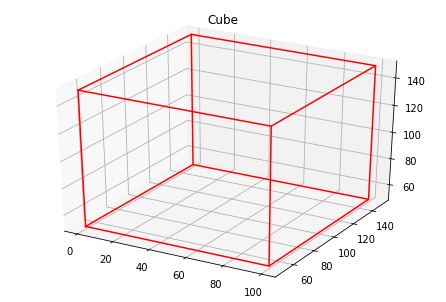

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

def plot_linear_cube(x, y, z, dx, dy, dz, color='red'):
    fig = plt.figure()
    ax = Axes3D(fig)
    xx = [x, x, x+dx, x+dx, x]
    yy = [y, y+dy, y+dy, y, y]
    kwargs = {'alpha': 1, 'color': color}
    ax.plot3D(xx, yy, [z]*5, **kwargs)
    ax.plot3D(xx, yy, [z+dz]*5, **kwargs)
    ax.plot3D([x, x], [y, y], [z, z+dz], **kwargs)
    ax.plot3D([x, x], [y+dy, y+dy], [z, z+dz], **kwargs)
    ax.plot3D([x+dx, x+dx], [y+dy, y+dy], [z, z+dz], **kwargs)
    ax.plot3D([x+dx, x+dx], [y, y], [z, z+dz], **kwargs)
    plt.title('Cube')
    plt.show()

plot_linear_cube(0, 50, 50, 100, 100, 100)